In [46]:
import matplotlib.pyplot as plt
import math
import numpy as np
from math import factorial

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

In [2]:
A=(4, 5)
B=(-2, -4)
C=(8, -1)

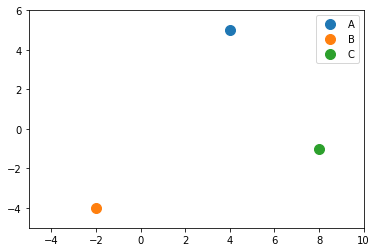

In [3]:
fig, ax = plt.subplots()

plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 6])

plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [4]:
AB = 5 - (-4)
AB_ = 4 - (-2)
Dist_AB = math.sqrt(AB**2 + AB_**2)
Dist_AB

10.816653826391969

In [5]:
AC = 5 - (-1)
AC_ = 8 - (4)
Dist_AC = math.sqrt(AC**2 + AC_**2)
Dist_AC

7.211102550927978

In [6]:
BC = -1 - (-4)
BC_ = 8 - (-2)
Dist_BC = math.sqrt(BC**2 + BC_**2)
Dist_BC

10.44030650891055

#### 1.3. What is the perimeter of triangle $ABC$?

In [7]:
Per_ABC = Dist_AB + Dist_AC + Dist_BC
Per_ABC

28.4680628862305

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [8]:
def initialize_grid():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # where do we want lines
    ticks = np.arange(-10, 10, 1)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

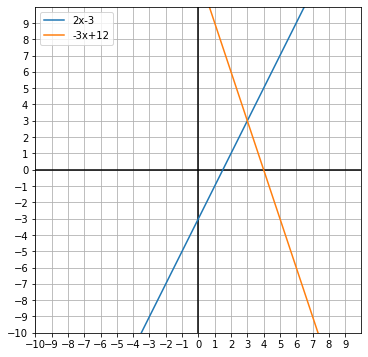

In [9]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

y1=2*x-3 
y2=-3*x+12

initialize_grid()
# "-" for line type
plt.plot(x, y1, "-", markersize=10, label="2x-3")
plt.plot(x, y2, "-", markersize=10, label="-3x+12")

plt.legend()

#### 2.2. What are the respective slopes

In [10]:
y1 = 2
y2 = -3

#### 2.3. Give 3 points through which $y_1$ goes through

In [11]:
y1=2*x-3 
points = [1,2,3]

#### 2.4. Where do they intersect?

In [12]:
y=2*x-3
y2=-3*x+12
despejar = "2x-3=-3x+12 --> 2x+3x=3+12 --> x(2+3)=3+12 --> x= 15/3--> x= 3"
print(f"x = 3")
print(f"y = 3")

x = 3
y = 3


#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

In [13]:
edad = 39-21
salario = 33400-10000
y = (salario*55)/edad
y

71500.0

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

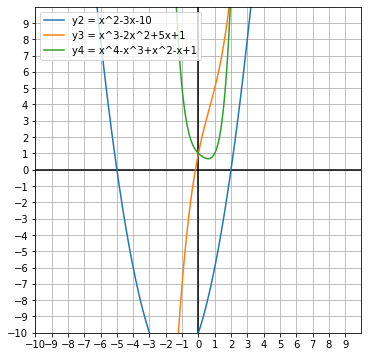

In [14]:
initialize_grid()

x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)
y2 = x ** 2 + 3 * x - 10
y3 = x ** 3 - 2 * x ** 2 + 5 * x +1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1

plt.plot(x, y2, "-", label="y2 = x^2-3x-10")
plt.plot(x, y3, "-", label="y3 = x^3-2x^2+5x+1")
plt.plot(x, y4, "-", label="y4 = x^4-x^3+x^2-x+1")

plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [34]:
y2 = x ** 2 + 3 * x - 10
y3 = x ** 3 - 2 * x ** 2 + 5 * x +1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
x=0
print(y2)
print(y3)
print(y4)

0
11
11


In [35]:
y2 = x ** 2 + 3 * x - 10
y3 = x ** 3 - 2 * x ** 2 + 5 * x +1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
x=2
print(y2)
print(y3)
print(y4)

-10
1
1


In [37]:
y2 = x ** 2 + 3 * x - 10
y3 = x ** 3 - 2 * x ** 2 + 5 * x +1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
x=100
print(y2)
print(y3)
print(y4)

10290
980501
99009901


#### 3.3. Who is the vertex of parabola $y_2$?

#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

#### 3.5. As x gets very big, what happens to $y$ go in each case?

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [18]:
e = np.e
round(e,3)

2.718

#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [19]:
e **0

1.0

In [20]:
e **1

2.718281828459045

In [21]:
e **2

7.3890560989306495

In [22]:
e**3

20.085536923187664

In [23]:
e**10

22026.465794806703

#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [24]:
e**0

1.0

In [25]:
e**-1

0.36787944117144233

In [26]:
e**-2

0.1353352832366127

In [27]:
e**-3

0.04978706836786395

In [28]:
e**-10,5

(4.5399929762484875e-05, 5)

#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

In [29]:
y1 = e ** x
y2 = e ** (2*x)
y3 = e ** (-x)

In [30]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

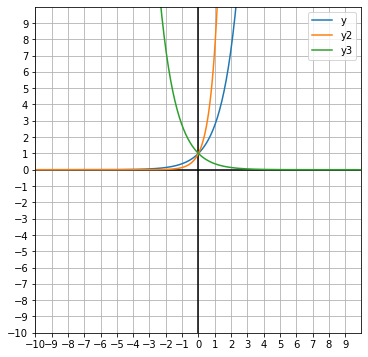

In [31]:
initialize_grid()

y = e ** x
y2 = e ** (2*x)
y3 = e ** (-x)

plt.plot(x, y, "-", label="y")
plt.plot(x, y2, "-", label="y2")
plt.plot(x, y3, "-", label="y3")
plt.legend()

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [38]:
4+5+6+7

22

$$\sum_{n=-2}^3 (n + 1)$$

In [41]:
lista = []
for i in range(-2,4):
    lista.append(i+1)
sum(lista)

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [43]:
lista = []
for i in range(-2,4):
    lista.append((i**2)-2)
sum(lista)

7

$$\sum_{n=0}^4 (10^n - 1)$$

In [45]:
lista = []
for i in range(0,5):
    lista.append((10**i)-1)
sum(lista)

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

In [47]:
handshakes = factorial(10)/(factorial(2)*factorial(8))
handshakes

45.0

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

In [48]:
task = factorial(11)/(factorial(8)*factorial(3))
task

165.0

### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000